![](https://www.medicoverhospitals.in/images/articles/chronic-kidney-disease.jpg)

In [1]:
# import necessary libraries like numpy, pandas, pyplot and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [2]:
# reading dataset
chronic_df = pd.read_csv("kidney_disease.csv")
chronic_df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


## **`Dataset Description`**
- age		-	age	
- bp		-	blood pressure
- sg		-	specific gravity
- al		-   	albumin
- su		-	sugar
- rbc		-	red blood cells
- pc		-	pus cell
- pcc		-	pus cell clumps
- ba		-	bacteria
- bgr		-	blood glucose random
- bu		-	blood urea
- sc		-	serum creatinine
- sod		-	sodium
- pot		-	potassium
- hemo		-	hemoglobin
- pcv		-	packed cell volume
- wc		-	white blood cell count
- rc		-	red blood cell count
- htn		-	hypertension
- dm		-	diabetes mellitus
- cad		-	coronary artery disease
- appet		-	appetite
- pe		-	pedal edema
- ane		-	anemia
- class		-	class	
- ##################################################
%
- Number of Attributes: 24 + class = 25 ( 11  numeric ,14  nominal) 
%
<h3>Attribute Information :</h3>
- 1.Age(numerical)
  	  	age in years
- 	2.Blood Pressure(numerical)
	       	bp in mm/Hg
-	3.Specific Gravity(nominal)
	  	sg - (1.005,1.010,1.015,1.020,1.025)
- 	4.Albumin(nominal)
		  al - (0,1,2,3,4,5)
-	5.Sugar(nominal)
		  su - (0,1,2,3,4,5)
- 	6.Red Blood Cells(nominal)
		  rbc - (normal,abnormal)
- 	7.Pus Cell (nominal)
		  pc - (normal,abnormal)
- 	8.Pus Cell clumps(nominal)
		  pcc - (present,notpresent)
- 	9.Bacteria(nominal)
		  ba  - (present,notpresent)
- 	10.Blood Glucose Random(numerical)		
		  bgr in mgs/dl
- 	11.Blood Urea(numerical)	
		  bu in mgs/dl
- 	12.Serum Creatinine(numerical)	
		  sc in mgs/dl
- 	13.Sodium(numerical)
		  sod in mEq/L
- 	14.Potassium(numerical)	
		  pot in mEq/L
- 	15.Hemoglobin(numerical)
		  hemo in gms
- 	16.Packed  Cell Volume(numerical)
- 	17.White Blood Cell Count(numerical)
		  wc in cells/cumm
- 	18.Red Blood Cell Count(numerical)	
		  rc in millions/cmm
- 	19.Hypertension(nominal)	
		  htn - (yes,no)
- 	20.Diabetes Mellitus(nominal)	
		  dm - (yes,no)
- 	21.Coronary Artery Disease(nominal)
		  cad - (yes,no)
- 	22.Appetite(nominal)	
	      appet - (good,poor)
- 	23.Pedal Edema(nominal)
		  pe - (yes,no)	
- 	24.Anemia(nominal)
		  ane - (yes,no)
- 	25.Class (nominal)		
		  class - (ckd,notckd)


In [3]:
# checking info of columns and null values
chronic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

## **`Data Cleaning`**

In [4]:
# drop id column
chronic_df = chronic_df.drop("id",axis=1)
chronic_df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
# rename column names to make it more user-friendly
chronic_df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema',
              'anemia', 'class']
chronic_df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


### According to the data description
- Columns (pcv, wc and rc) needs to convert back in numerical since it is object right now
- Columns (sg, al and su) should be nominal , convert from float to object

In [6]:
# Categorical cols like specific_gravity, albumin and sugar which is float type right now
# converting back to nominal data type categorical
chronic_df[["specific_gravity","albumin","sugar"]] = chronic_df[["specific_gravity","albumin","sugar"]].astype("object")

In [7]:
# converting necessary columns like packed_cell_volume, white-blood_cell_count and red_blood_cell_count
# currently it is in object type and converting back to numerical type
chronic_df['packed_cell_volume'] = pd.to_numeric(chronic_df['packed_cell_volume'],errors='coerce')
chronic_df['white_blood_cell_count'] = pd.to_numeric(chronic_df['white_blood_cell_count'],errors='coerce')
chronic_df['red_blood_cell_count'] = pd.to_numeric(chronic_df['red_blood_cell_count'],errors='coerce')

In [8]:
chronic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    object 
 3   albumin                  354 non-null    object 
 4   sugar                    351 non-null    object 
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [9]:
# Extracting categorical and numerical columns
cat_cols = []
num_cols = []

for i in chronic_df.columns:
    if chronic_df[i].dtype == "object":
        cat_cols.append(i)
    else:
        num_cols.append(i)

In [10]:
cat_cols

['specific_gravity',
 'albumin',
 'sugar',
 'red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'pedal_edema',
 'anemia',
 'class']

In [11]:
num_cols

['age',
 'blood_pressure',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [12]:
# by looping & looking at unique values in categorical columns
for i in cat_cols:
    print(f"{i} has {chronic_df[i].unique()} values\n")

specific_gravity has [1.02 1.01 1.005 1.015 nan 1.025] values

albumin has [1.0 4.0 2.0 3.0 0.0 nan 5.0] values

sugar has [0.0 3.0 4.0 1.0 nan 2.0 5.0] values

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

pedal_edema has ['no' 'yes' nan] values

anemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



In [13]:
# replace incorrect values like '\tno', '\tyes', ' yes', '\tno', 'ckd\t', 'notckd'  in categorical cols
chronic_df['diabetes_mellitus'].replace({'\tno':'no','\tyes':'yes'},inplace=True)
chronic_df['coronary_artery_disease'].replace({'\tno':'no'},inplace=True)
chronic_df['class'].replace({'ckd\t':'ckd'},inplace=True)

In [14]:
# Converting target col class into 0(chronic kidney) and 1(not a chronic kidney)
chronic_df['class'] = chronic_df['class'].map({'ckd':0,'notckd':1})

# coverting target col into numeric to check correlation
chronic_df['class'] = pd.to_numeric(chronic_df['class'],errors='coerce')

In [15]:
chronic_df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,0
1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,0
2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,0
4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,0


In [16]:
# let's see the cols in numerical col list
num_cols

['age',
 'blood_pressure',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

## **`EDA`**

<Figure size 2000x1200 with 0 Axes>

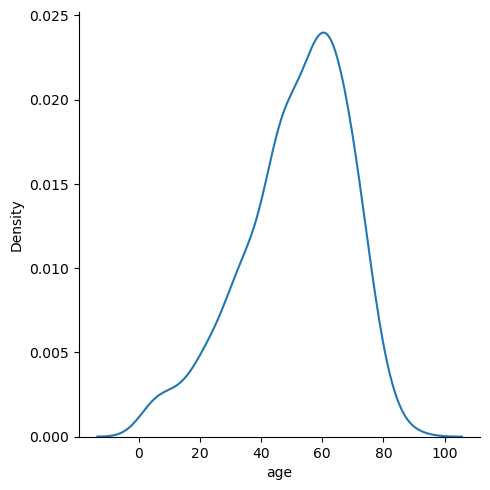

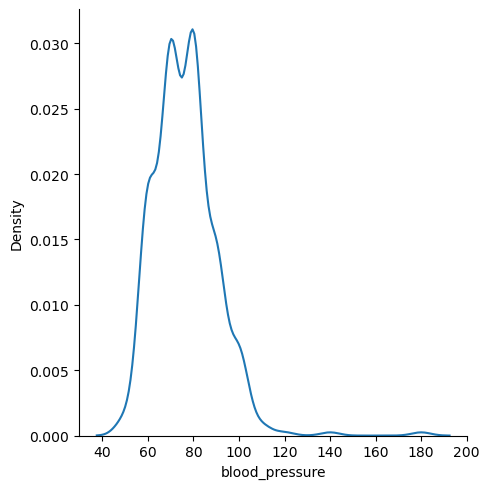

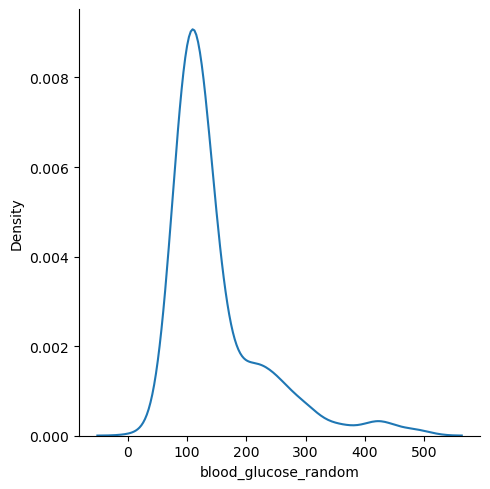

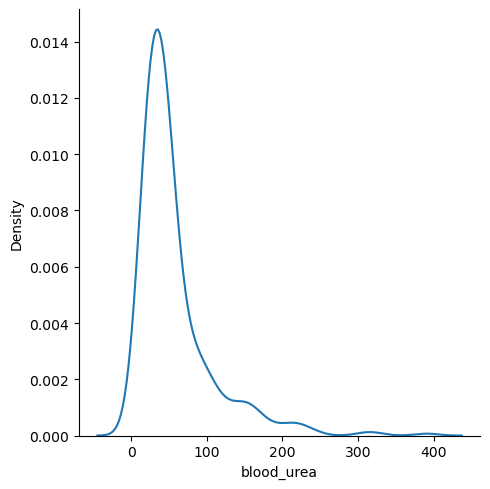

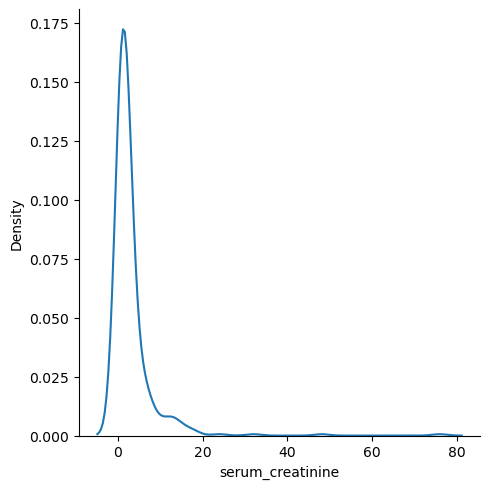

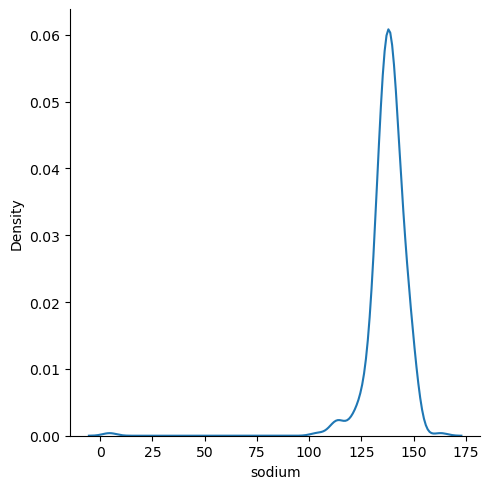

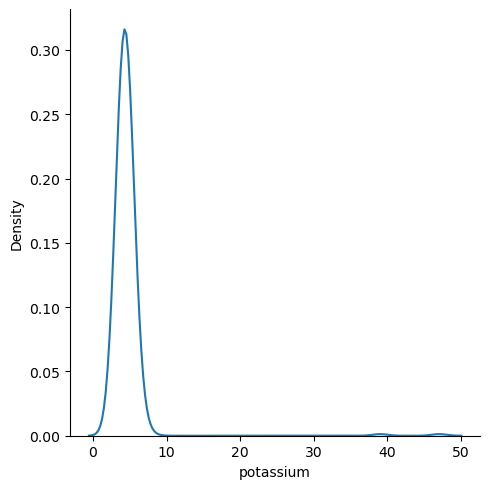

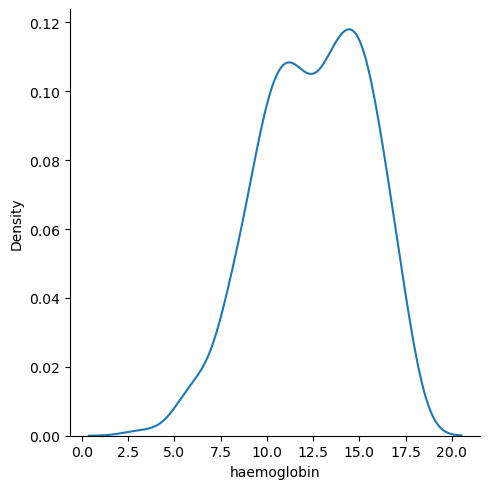

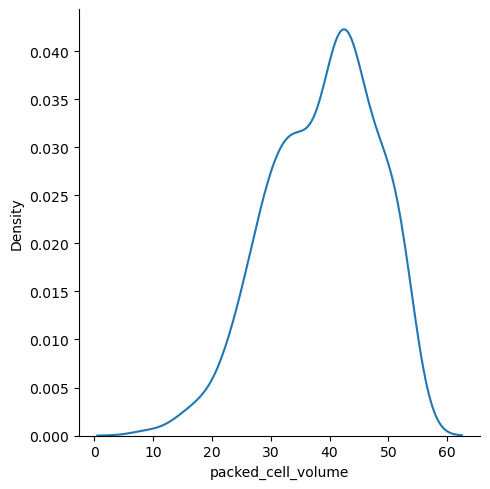

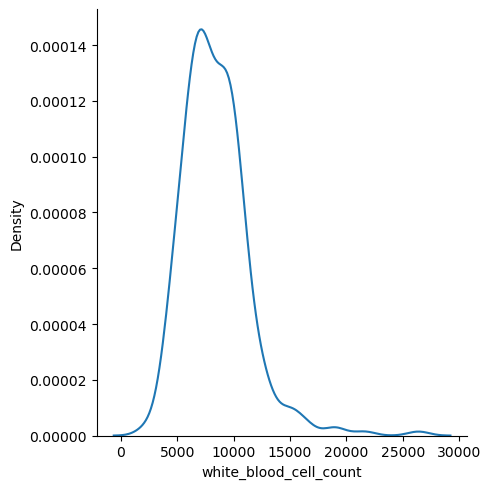

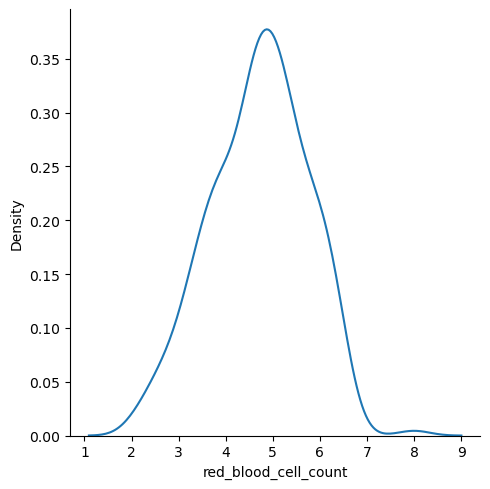

In [17]:
# checking numerical features distribution
plt.figure(figsize=(20,12))

# looping over num cols and checking its distribution
for i in num_cols:
    sns.displot(chronic_df[i],kind="kde")
    plt.show()

In [18]:
# let's see the cols in cat col list
cat_cols

['specific_gravity',
 'albumin',
 'sugar',
 'red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'pedal_edema',
 'anemia',
 'class']

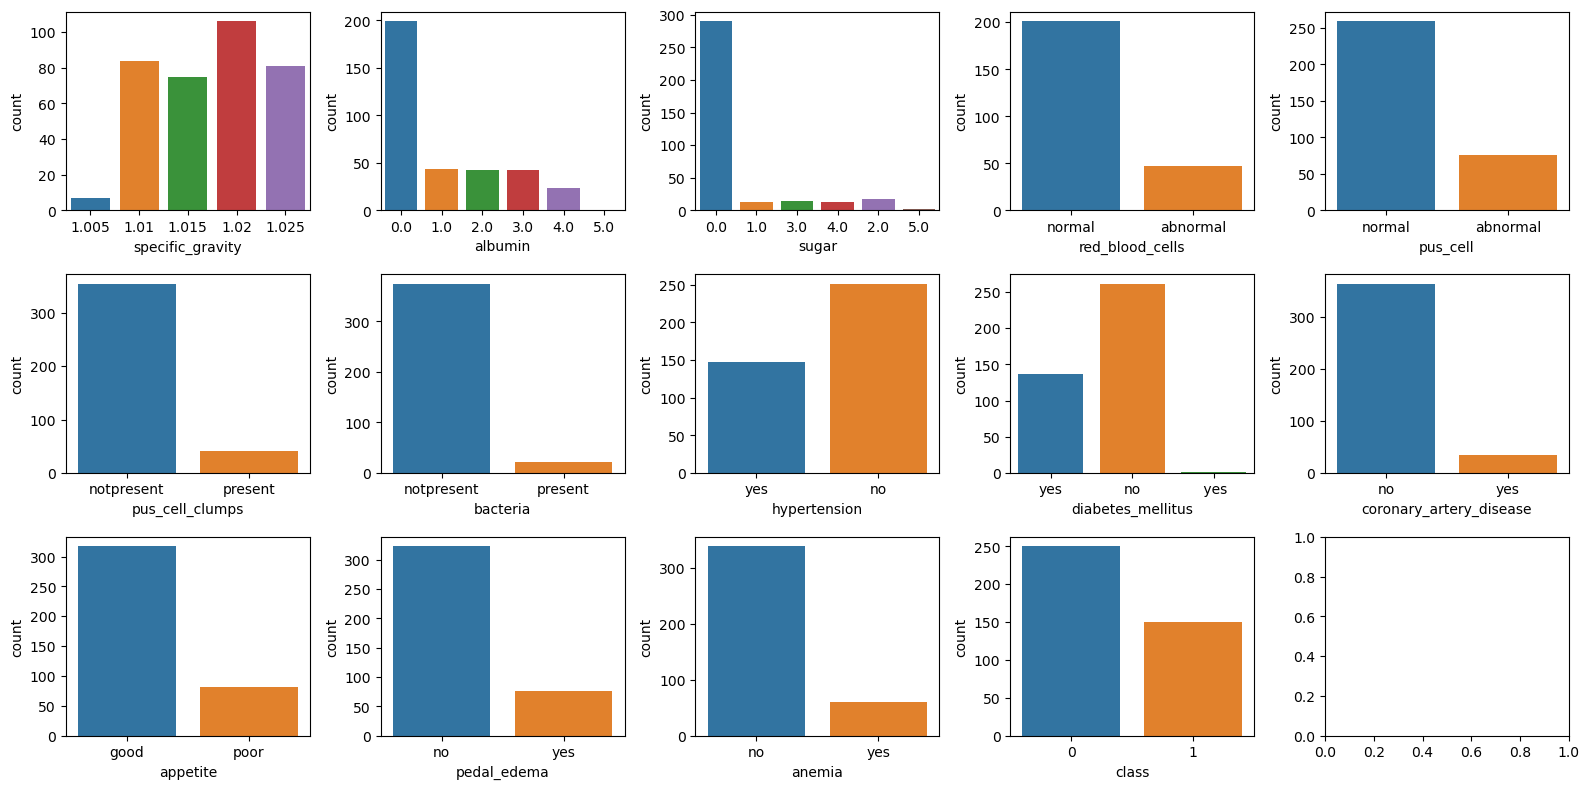

In [19]:
# checking cat features distribution

# Create the figure and axes
fig, axes = plt.subplots(3, 5, figsize=(16, 8))
axes = axes.ravel()  # Flattening the array makes indexing easier

# Loop over cat cols and plot countplot
for i, col in enumerate(cat_cols):
    sns.countplot(data=chronic_df, x=col, ax=axes[i])
    axes[i].set_xlabel(col)

# Add spacing between subplots
fig.tight_layout()

# Show the plots
plt.show()

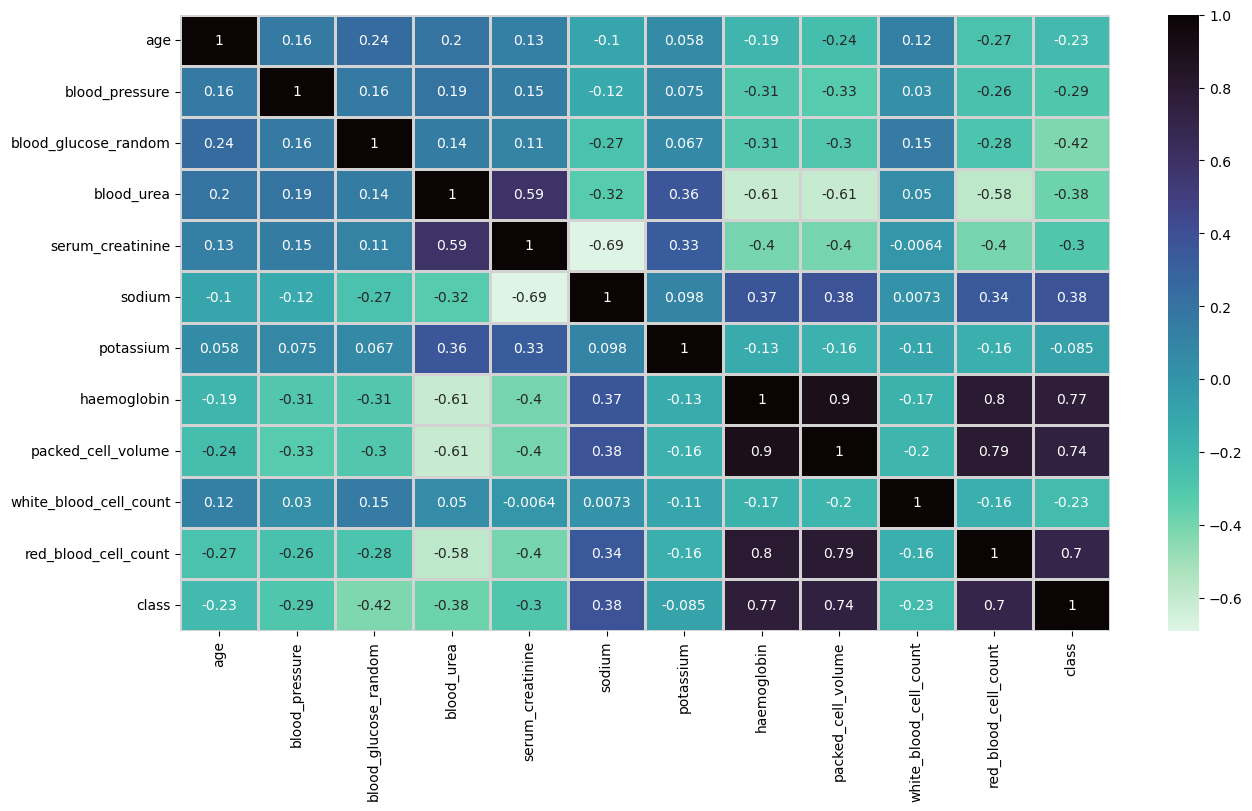

In [20]:
# correlated heatmap of data
plt.figure(figsize = (15, 8))
sns.heatmap(chronic_df.corr(),annot=True,linewidths=2,linecolor='lightgrey',cmap="mako_r")
plt.show()

In [21]:
# let's check count of null values in whole df
chronic_df.isnull().sum().sort_values(ascending=False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

In [22]:
# let's check count of null values in num_cols
chronic_df[num_cols].isnull().sum().sort_values(ascending=False)

red_blood_cell_count      131
white_blood_cell_count    106
potassium                  88
sodium                     87
packed_cell_volume         71
haemoglobin                52
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
blood_pressure             12
age                         9
dtype: int64

In [23]:
# let's check count of null values in cat cols
chronic_df[cat_cols].isnull().sum().sort_values(ascending=False)

red_blood_cells            152
pus_cell                    65
sugar                       49
specific_gravity            47
albumin                     46
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

## **`Missing Value Treatment`**

In [24]:
# filling null values, we will use two methods, random sampling for higher null values and 
# mean/mode sampling for lower null values

# Creating a function for imputing random values
def random_value_imputation(feature):
    # Get the indices of missing values
    missing_indices = chronic_df[chronic_df[feature].isnull()].index
    
    # Generate random values to fill missing values
    random_values = np.random.choice(chronic_df[feature].dropna(), size=len(missing_indices))
    
    # Update the DataFrame with random values
    chronic_df.loc[missing_indices, feature] = random_values

# creating func for imputing most common value(modal value)
def impute_mode(feature):
    mode = chronic_df[feature].mode()[0]
    chronic_df[feature] = chronic_df[feature].fillna(mode)

In [25]:
# filling num_cols null values using random sampling method
for i in num_cols:
    random_value_imputation(i)

In [26]:
# let's check count of null values in num_cols again
chronic_df[num_cols].isnull().sum().sort_values(ascending=False)

age                       0
blood_pressure            0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [27]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation
random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

In [28]:
# filling cat_cols null values with modal treatment
for i in cat_cols:
    impute_mode(i)

In [29]:
# let's check count of null values in cat_cols again
chronic_df[cat_cols].isnull().sum().sort_values(ascending=False)

specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64

In [30]:
# Dataframe
chronic_df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,0
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,100.0,...,38.0,6000.0,3.9,no,no,no,good,no,no,0
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,4.5,no,yes,no,poor,no,yes,0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,0
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,0


In [31]:
# check unique values in each cat col by looping over cat cols
for i in cat_cols:
    print(f"{i} has {chronic_df[i].nunique()} categories\n")

specific_gravity has 5 categories

albumin has 6 categories

sugar has 6 categories

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 3 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

pedal_edema has 2 categories

anemia has 2 categories

class has 2 categories



In [32]:
# using labelencoder and applying on cat cols
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in cat_cols[3:]:  # We are starting from 3 as we have changed the datatype of first 3 columns of cat_cols
    chronic_df[i] = le.fit_transform(chronic_df[i])

In [33]:
# check chronic df after transforming cat cols
chronic_df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,2,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,100.0,...,38.0,6000.0,3.9,0,1,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.5,0,2,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,1,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,1,0,0,0,0,0


In [34]:
# Split data into features and target variables (X and y)
x = chronic_df.iloc[:,:-1]
y = chronic_df.iloc[:,-1]

In [35]:
x

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,15.4,44.0,7800.0,5.2,1,2,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,100.0,...,11.3,38.0,6000.0,3.9,0,1,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,9.6,31.0,7500.0,4.5,0,2,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11.2,32.0,6700.0,3.9,1,1,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,11.6,35.0,7300.0,4.6,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,15.7,47.0,6700.0,4.9,0,1,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,16.5,54.0,7800.0,6.2,0,1,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,15.8,49.0,6600.0,5.4,0,1,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,14.2,51.0,7200.0,5.9,0,1,0,0,0,0


In [36]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: class, Length: 400, dtype: int64

In [37]:
# splitting data intp training and test set, so import train_test_split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)

## **`Model Building`**

In [38]:
# import LogisticRegressionClassifier
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(xtrain,ytrain)
ypred = lgr.predict(xtest)

# accuracy score, confusion matrix and classification report of lgr
lgr_cm = confusion_matrix(ytest,ypred)
lgr_cr = classification_report(ytest,ypred)
lgr_ac = accuracy_score(ytest,ypred)

print("Confusion Matrix for Logistic Regression is: \n",lgr_cm)
print("\n")
print("Classification Report for Logistic Regression is: \n",lgr_cr)
print("\n")
print("Accuracy Score for Logistic Regression is: \n",lgr_ac)
print("\n")

lgr_train = lgr.score(xtrain,ytrain)
lgr_test = lgr.score(xtest,ytest)
print(f'Training Score for Logistic Regression: {lgr_train}\nTesting Score for Logistic Regression: {lgr_test}')

Confusion Matrix for Logistic Regression is: 
 [[58 12]
 [ 7 43]]


Classification Report for Logistic Regression is: 
               precision    recall  f1-score   support

           0       0.89      0.83      0.86        70
           1       0.78      0.86      0.82        50

    accuracy                           0.84       120
   macro avg       0.84      0.84      0.84       120
weighted avg       0.85      0.84      0.84       120



Accuracy Score for Logistic Regression is: 
 0.8416666666666667


Training Score for Logistic Regression: 0.9107142857142857
Testing Score for Logistic Regression: 0.8416666666666667


In [39]:
# import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)

# accuracy score, confusion matrix and classification report of knn
knn_cm = confusion_matrix(ytest,ypred)
knn_cr = classification_report(ytest,ypred)
knn_ac = accuracy_score(ytest,ypred) 

print("Confusion Matrix for KNeighborsClassifier is: \n",knn_cm)
print("\n")
print("Classification Report for KNeighborsClassifier is: \n",knn_cr)
print("\n")
print("Accuracy Score for KNeighborsClassifier is: \n",knn_ac)
print("\n")

knn_train = knn.score(xtrain,ytrain)
knn_test = knn.score(xtest,ytest)
print(f'Training Score for KNeighbors Classifier: {knn_train}\nTesting Score for KNeighbors Classifier: {knn_test}')

Confusion Matrix for KNeighborsClassifier is: 
 [[42 28]
 [15 35]]


Classification Report for KNeighborsClassifier is: 
               precision    recall  f1-score   support

           0       0.74      0.60      0.66        70
           1       0.56      0.70      0.62        50

    accuracy                           0.64       120
   macro avg       0.65      0.65      0.64       120
weighted avg       0.66      0.64      0.64       120



Accuracy Score for KNeighborsClassifier is: 
 0.6416666666666667


Training Score for KNeighbors Classifier: 0.8035714285714286
Testing Score for KNeighbors Classifier: 0.6416666666666667


In [40]:
# import DecisionTreeClassifer
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)
ypred = dtc.predict(xtest)

# accuracy score, confusion matrix and classification report of decision tree
dtc_cm = confusion_matrix(ytest,ypred)
dtc_cr = classification_report(ytest,ypred)
dtc_ac = accuracy_score(ytest,ypred)

print("Confusion Matrix for DecisionTree Classifier is: \n",dtc_cm)
print("\n")
print("Classification Report for DecisionTree Classifier is: \n",dtc_cr)
print("\n")
print("Accuracy Score for DecisionTree Classifier is: \n",dtc_ac)
print("\n")

dtc_train = dtc.score(xtrain,ytrain)
dtc_test = dtc.score(xtest,ytest)
print(f'Training Score for DecisionTree Classifier: {dtc_train}\nTesting Score for DecisionTree Classifier: {dtc_test}')

Confusion Matrix for DecisionTree Classifier is: 
 [[68  2]
 [ 2 48]]


Classification Report for DecisionTree Classifier is: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        70
           1       0.96      0.96      0.96        50

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



Accuracy Score for DecisionTree Classifier is: 
 0.9666666666666667


Training Score for DecisionTree Classifier: 1.0
Testing Score for DecisionTree Classifier: 0.9666666666666667


In [41]:
# Hyper Parameter Tuning of Decision Tree
# importing GridSearchCV
from sklearn.model_selection import GridSearchCV

grid_param = {'criterion' : ['gini', 'entropy'],
              'max_depth' : [3, 5, 7, 10],
              'splitter' : ['best', 'random'],
              'min_samples_leaf' : [1, 2, 3, 5, 7],
              'min_samples_split' : [1, 2, 3, 5, 7],
              'max_features' : ['auto', 'sqrt', 'log2']}

# Apply gridsearchcv with cv = 5, n_jobs = -1, verbose = 1
grid_search_dtc = GridSearchCV(dtc,grid_param,cv=5,n_jobs=-1,verbose=1)
grid_search_dtc.fit(xtrain,ytrain)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [42]:
# print best parameters and best score in grid search dtc
print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'best'}
0.9892857142857142


In [43]:
# storing best estimator
dtc = grid_search_dtc.best_estimator_
ypred = dtc.predict(xtest)

# accuracy score, confusion matrix and classification report of decision tree
dtc_cm = confusion_matrix(ytest,ypred)
dtc_cr = classification_report(ytest,ypred)
dtc_ac = accuracy_score(ytest,ypred)

print("Confusion Matrix for DecisionTree Classifier is: \n",dtc_cm)
print("\n")
print("Classification Report for DecisionTree Classifier is: \n",dtc_cr)
print("\n")
print("Accuracy Score for DecisionTree Classifier is: \n",dtc_ac)
print("\n")

dtc_train = dtc.score(xtrain,ytrain)
dtc_test = dtc.score(xtest,ytest)
print(f'Training Score for DecisionTree Classifier: {dtc_train}\nTesting Score for DecisionTree Classifier: {dtc_test}')

Confusion Matrix for DecisionTree Classifier is: 
 [[67  3]
 [ 3 47]]


Classification Report for DecisionTree Classifier is: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        70
           1       0.94      0.94      0.94        50

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



Accuracy Score for DecisionTree Classifier is: 
 0.95


Training Score for DecisionTree Classifier: 0.9964285714285714
Testing Score for DecisionTree Classifier: 0.95


In [44]:
# import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion='entropy',max_depth=11,max_features='auto',min_samples_leaf=2,min_samples_split=3,n_estimators=3)
rfc.fit(xtrain,ytrain)
ypred = rfc.predict(xtest)

# accuracy score, confusion matrix and classification report of RandomForest Classifier
rfc_cm = confusion_matrix(ytest,ypred)
rfc_cr = classification_report(ytest,ypred)
rfc_ac = accuracy_score(ytest,ypred)

print("Confusion Matrix for RandomForest Classifier is: \n",rfc_cm)
print("\n")
print("Classification Report for RandomForest Classifier is: \n",rfc_cr)
print("\n")
print("Accuracy Score for RandomForest Classifier is: \n",rfc_ac)
print("\n")

rfc_train = rfc.score(xtrain,ytrain)
rfc_test = rfc.score(xtest,ytest)
print(f'Training Score for RandomForest Classifier: {rfc_train}\nTesting Score for RandomForest Classifier: {rfc_test}')

Confusion Matrix for RandomForest Classifier is: 
 [[65  5]
 [ 2 48]]


Classification Report for RandomForest Classifier is: 
               precision    recall  f1-score   support

           0       0.97      0.93      0.95        70
           1       0.91      0.96      0.93        50

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120



Accuracy Score for RandomForest Classifier is: 
 0.9416666666666667


Training Score for RandomForest Classifier: 0.9857142857142858
Testing Score for RandomForest Classifier: 0.9416666666666667


In [45]:
# import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
adc = AdaBoostClassifier(base_estimator=dtc)
adc.fit(xtrain,ytrain)
ypred = adc.predict(xtest)

# accuracy score, confusion matrix and classification report of AdaBoost Classifier
adc_cm = confusion_matrix(ytest,ypred)
adc_cr = classification_report(ytest,ypred)
adc_ac = accuracy_score(ytest,ypred)

print("Confusion Matrix for AdaBoost Classifier is: \n",adc_cm)
print("\n")
print("Classification Report for AdaBoost Classifier is: \n",adc_cr)
print("\n")
print("Accuracy Score for AdaBoost Classifier is: \n",adc_ac)
print("\n")

adc_train = adc.score(xtrain,ytrain)
adc_test = adc.score(xtest,ytest)
print(f'Training Score for AdaBoost Classifier: {adc_train}\nTesting Score for AdaBoost Classifier: {adc_test}')

Confusion Matrix for AdaBoost Classifier is: 
 [[69  1]
 [ 1 49]]


Classification Report for AdaBoost Classifier is: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        70
           1       0.98      0.98      0.98        50

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



Accuracy Score for AdaBoost Classifier is: 
 0.9833333333333333


Training Score for AdaBoost Classifier: 1.0
Testing Score for AdaBoost Classifier: 0.9833333333333333


In [46]:
# import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(xtrain,ytrain)
ypred = gbc.predict(xtest)

# accuracy score, confusion matrix and classification report of GradientBoosting Classifier
gbc_cm = confusion_matrix(ytest,ypred)
gbc_cr = classification_report(ytest,ypred)
gbc_ac = accuracy_score(ytest,ypred)

print("Confusion Matrix for GradientBoosting Classifier is: \n",gbc_cm)
print("\n")
print("Classification Report for GradientBoosting Classifier is: \n",gbc_cr)
print("\n")
print("Accuracy Score for GradientBoosting Classifier is: \n",gbc_ac)
print("\n")

gbc_train = gbc.score(xtrain,ytrain)
gbc_test = gbc.score(xtest,ytest)
print(f'Training Score for GradientBoosting Classifier: {gbc_train}\nTesting Score for GradientBoosting Classifier: {gbc_test}')

Confusion Matrix for GradientBoosting Classifier is: 
 [[68  2]
 [ 2 48]]


Classification Report for GradientBoosting Classifier is: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        70
           1       0.96      0.96      0.96        50

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



Accuracy Score for GradientBoosting Classifier is: 
 0.9666666666666667


Training Score for GradientBoosting Classifier: 1.0
Testing Score for GradientBoosting Classifier: 0.9666666666666667


In [47]:
# using max_depth = 4, subsample = 0.90, max_features = 0.75, n_estimators = 200
# using Hyperparameters
gbchp = GradientBoostingClassifier(max_depth = 4, subsample = 0.90, max_features = 0.75, n_estimators = 200)
gbchp.fit(xtrain,ytrain)
ypred = gbchp.predict(xtest) 

# accuracy score, confusion matrix and classification report of stochastic gradient boosting classifier
gbchp_cm = confusion_matrix(ytest,ypred)
gbchp_cr = classification_report(ytest,ypred)
gbchp_ac = accuracy_score(ytest,ypred)

print("Confusion Matrix for GradientBoosting Classifier is: \n",gbchp_cm)
print("\n")
print("Classification Report for GradientBoosting Classifier is: \n",gbchp_cr)
print("\n")
print("Accuracy Score for GradientBoosting Classifier is: \n",gbchp_ac)
print("\n")

gbchp_train = gbchp.score(xtrain,ytrain)
gbchp_test = gbchp.score(xtest,ytest)
print(f'Training Score for GradientBoosting Classifier: {gbchp_train}\nTesting Score for GradientBoosting Classifier: {gbchp_test}')

Confusion Matrix for GradientBoosting Classifier is: 
 [[69  1]
 [ 2 48]]


Classification Report for GradientBoosting Classifier is: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        70
           1       0.98      0.96      0.97        50

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



Accuracy Score for GradientBoosting Classifier is: 
 0.975


Training Score for GradientBoosting Classifier: 1.0
Testing Score for GradientBoosting Classifier: 0.975


In [48]:
# import XGBClassifier
from xgboost import XGBClassifier
xgb = XGBClassifier(objective='binary:logistic',learning_rate=0.5,max_depth=5,n_estimators=150)
xgb.fit(xtrain,ytrain)
ypred = xgb.predict(xtest)

# accuracy score, confusion matrix and classification report of XGB Classifier
xgb_cm = confusion_matrix(ytest,ypred)
xgb_cr = classification_report(ytest,ypred)
xgb_ac = accuracy_score(ytest,ypred)

print("Confusion Matrix for XGB Classifier is: \n",xgb_cm)
print("\n")
print("Classification Report for XGB Classifier is: \n",xgb_cr)
print("\n")
print("Accuracy Score for XGB Classifier is: \n",xgb_ac)
print("\n")

xgb_train = xgb.score(xtrain,ytrain)
xgb_test = xgb.score(xtest,ytest)
print(f'Training Score for XGB Classifier: {xgb_train}\nTesting Score for XGB Classifier: {xgb_test}')

Confusion Matrix for XGB Classifier is: 
 [[68  2]
 [ 1 49]]


Classification Report for XGB Classifier is: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98        70
           1       0.96      0.98      0.97        50

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120



Accuracy Score for XGB Classifier is: 
 0.975


Training Score for XGB Classifier: 1.0
Testing Score for XGB Classifier: 0.975


In [49]:
# pip install catboost

In [50]:
# import CatBoostClassifier
from catboost import CatBoostClassifier
cat = CatBoostClassifier(iterations=10)
cat.fit(xtrain,ytrain)
ypred = cat.predict(xtest)

# accuracy score, confusion matrix and classification report of CatBoost Classifier
cat_cm = confusion_matrix(ytest,ypred)
cat_cr = classification_report(ytest,ypred)
cat_ac = accuracy_score(ytest,ypred)

print("Confusion Matrix for CatBoost Classifier is: \n",cat_cm)
print("\n")
print("Classification Report for CatBoost Classifier is: \n",cat_cr)
print("\n")
print("Accuracy Score for CatBoost Classifier is: \n",cat_ac)
print("\n")

cat_train = cat.score(xtrain,ytrain)
cat_test = cat.score(xtest,ytest)
print(f'Training Score for CatBoost Classifier: {cat_train}\nTesting Score for CatBoost Classifier: {cat_test}')

Learning rate set to 0.408198
0:	learn: 0.2681739	total: 148ms	remaining: 1.33s
1:	learn: 0.1108032	total: 159ms	remaining: 636ms
2:	learn: 0.0675931	total: 167ms	remaining: 389ms
3:	learn: 0.0464796	total: 176ms	remaining: 264ms
4:	learn: 0.0343439	total: 185ms	remaining: 185ms
5:	learn: 0.0273666	total: 190ms	remaining: 126ms
6:	learn: 0.0225256	total: 194ms	remaining: 83.2ms
7:	learn: 0.0191557	total: 199ms	remaining: 49.7ms
8:	learn: 0.0165690	total: 203ms	remaining: 22.5ms
9:	learn: 0.0139754	total: 206ms	remaining: 0us
Confusion Matrix for CatBoost Classifier is: 
 [[68  2]
 [ 0 50]]


Classification Report for CatBoost Classifier is: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        70
           1       0.96      1.00      0.98        50

    accuracy                           0.98       120
   macro avg       0.98      0.99      0.98       120
weighted avg       0.98      0.98      0.98       120



Accuracy Score for C

In [51]:
# import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(xtrain,ytrain)
ypred = etc.predict(xtest)

# accuracy score, confusion matrix and classification report of ExtraTrees Classifier
etc_cm = confusion_matrix(ytest,ypred)
etc_cr = classification_report(ytest,ypred)
etc_ac = accuracy_score(ytest,ypred)

print("Confusion Matrix for ExtraTrees Classifier is: \n",etc_cm)
print("\n")
print("Classification Report for ExtraTrees Classifier is: \n",etc_cr)
print("\n")
print("Accuracy Score for ExtraTrees Classifier is: \n",etc_ac)
print("\n")

etc_train = etc.score(xtrain,ytrain)
etc_test = etc.score(xtest,ytest)
print(f'Training Score for ExtraTrees Classifier: {etc_train}\nTesting Score for ExtraTrees Classifier: {etc_test}')

Confusion Matrix for ExtraTrees Classifier is: 
 [[70  0]
 [ 2 48]]


Classification Report for ExtraTrees Classifier is: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        70
           1       1.00      0.96      0.98        50

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



Accuracy Score for ExtraTrees Classifier is: 
 0.9833333333333333


Training Score for ExtraTrees Classifier: 1.0
Testing Score for ExtraTrees Classifier: 0.9833333333333333


In [52]:
# import LGBMClassifier
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(xtrain,ytrain)
ypred = lgbm.predict(xtest)

# accuracy score, confusion matrix and classification report of LGBM Classifier
lgbm_cm = confusion_matrix(ytest,ypred)
lgbm_cr = classification_report(ytest,ypred)
lgbm_ac = accuracy_score(ytest,ypred)

print("Confusion Matrix for LGBM Classifier is: \n",lgbm_cm)
print("\n")
print("Classification Report for LGBM Classifier is: \n",lgbm_cr)
print("\n")
print("Accuracy Score for LGBM Classifier is: \n",lgbm_ac)
print("\n")

lgbm_train = lgbm.score(xtrain,ytrain)
lgbm_test = lgbm.score(xtest,ytest)
print(f'Training Score for LGBM Classifier: {lgbm_train}\nTesting Score for LGBM Classifier: {lgbm_test}')

[LightGBM] [Info] Number of positive: 100, number of negative: 180
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000215 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 527
[LightGBM] [Info] Number of data points in the train set: 280, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.357143 -> initscore=-0.587787
[LightGBM] [Info] Start training from score -0.587787
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [53]:
# comparing all models accuracy by creating a df
# Create a DataFrame with model names and their corresponding scores
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNeighbors', 'DecisionTree',
              'RandomForest', 'AdaBoost', 'Gradient Boosting',
              'XGBoost', 'CatBoost', 'ExtraTree', 'LGBM'],
    'Score': [lgr_ac, knn_ac, dtc_ac, rfc_ac, adc_ac,
              gbchp_ac, xgb_ac, cat_ac, etc_ac, lgbm_ac]
})

# Sort the DataFrame by score in descending order
models = models.sort_values(by="Score", ascending=False)

# Display the sorted DataFrame
print(models)

                 Model     Score
4             AdaBoost  0.983333
7             CatBoost  0.983333
8            ExtraTree  0.983333
9                 LGBM  0.983333
5    Gradient Boosting  0.975000
6              XGBoost  0.975000
2         DecisionTree  0.950000
3         RandomForest  0.941667
0  Logistic Regression  0.841667
1           KNeighbors  0.641667


### After seeing the results, as some are the cases of slight overfitting too, we will be going ahead with RandomForest Classifier

## **`Problem`**

In [54]:
# we have to take some samples from the dataset itself
sample = chronic_df.sample(20)
sample.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
266,55.0,80.0,1.020,0.0,0.0,1,1,0,0,133.0,...,41.0,6800.0,5.3,0,1,0,0,0,0,1
294,75.0,60.0,1.020,0.0,0.0,1,1,0,0,110.0,...,40.0,8300.0,5.8,0,1,0,0,0,0,1
237,80.0,70.0,1.015,2.0,2.0,1,1,0,0,141.0,...,40.0,9600.0,5.1,1,2,0,1,1,0,0
347,43.0,60.0,1.025,0.0,0.0,1,1,0,0,108.0,...,43.0,7200.0,5.5,0,1,0,0,0,0,1
277,46.0,60.0,1.025,0.0,0.0,1,1,0,0,123.0,...,50.0,6300.0,4.8,0,1,0,0,0,0,1


In [55]:
#Preparing the x and y values
x_sample = sample.drop("class",axis=1)
y_sample = sample["class"]

In [60]:
#predicting the sample
predicted_out = rfc.predict(x_sample)
predicted_out

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
      dtype=int64)

In [61]:
y_sample   #Real values

266    1
294    1
237    0
347    1
277    1
196    0
194    0
204    0
68     0
131    0
380    1
112    0
243    0
13     0
40     0
59     0
377    1
176    0
107    0
283    1
Name: class, dtype: int64

### As we can see there is no difference in predicted values and real values.

## **`CONCLUSION`**:

1. According to this model, the predicted value we got, matches with the actual target values. Thus, the model is performing well.

2. We have performed EDA, preprocessing, buid different models, did hyper parameter tunning wherever required and did prediction.

In [62]:
import pickle

In [64]:
pickle.dump(rfc,open('model.pkl','wb+'))